In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Data Set

In [2]:
import pandas as pd
newspaper = pd.read_csv("C:\\Users\\Neha Excelr\\DataSets\\NewspaperData.csv")
newspaper.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [3]:
newspaper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


<AxesSubplot:xlabel='daily', ylabel='sunday'>

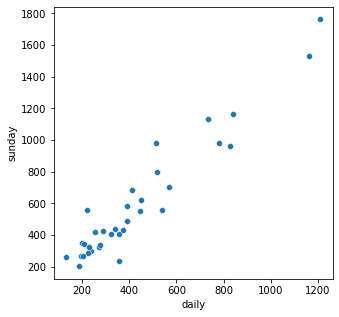

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'daily',y = 'sunday',data = newspaper,palette = 'Set1')

# Correlation

In [5]:
newspaper.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<AxesSubplot:xlabel='daily', ylabel='Density'>

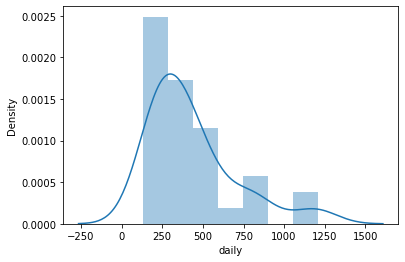

In [6]:
import seaborn as sns
sns.distplot(newspaper['daily'])

<AxesSubplot:xlabel='sunday', ylabel='Density'>

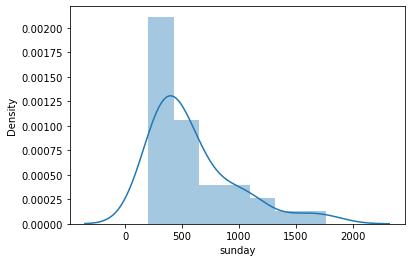

In [7]:
import seaborn as sns
sns.distplot(newspaper['sunday'])

Fitting a Linear Regression Model

In [8]:
import statsmodels.formula.api as smf

In [9]:
#OLS=Ordinary Least Squares
model = smf.ols("sunday~daily",data = newspaper).fit()

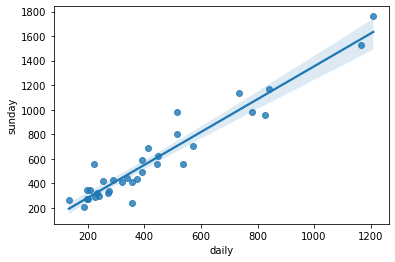

In [10]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="daily", y="sunday", data=newspaper);

In [11]:
#Coefficients
model.params

#Interpretation for Beta Coefficient of Daily
#For every unit increase in the Daily Circulation value, the value for Sunday Circulation will increase by 1.339715

Intercept    13.835630
daily         1.339715
dtype: float64

In [12]:
#To see the model predictions
model.fittedvalues

0      538.939509
1      706.442705
2      490.275710
3      333.431284
4      734.307432
5      996.884826
6      280.213795
7      352.279731
8      290.090172
9      323.546868
10     616.379041
11     400.438457
12     262.668890
13    1573.783417
14     609.447357
15     566.965002
16     378.613164
17    1061.219269
18    1633.852208
19    1119.786239
20     313.594128
21     489.224034
22     704.489401
23     309.195844
24     466.219792
25     277.920203
26     192.337885
27     514.901007
28     380.708478
29     777.960698
30     538.047259
31     284.270451
32     444.722729
33    1137.725020
dtype: float64

# y = B0 + B1*X1 + e

## B0 - Intercept
## B1 - Slope
## X1 - Independent data point
## e (error) - Vertical distance between the actual 'Sunday' value & the Sunday fitted value

In [13]:
13.835630 + 1.339715 * 391.952

538.93960368

In [14]:
13.835630 + 1.339715 * 516.981

706.442830415

In [15]:
#To generate the residual values
#Difference between Actual & Fitted Values
model.resid

0     -50.433509
1      91.855295
2    -255.191710
3     -33.980284
4    -175.214432
5     136.364174
6      68.530205
7      65.499269
8      54.431828
9      -0.462868
10      4.372959
11     22.866543
12    -60.054890
13    -42.256417
14    -55.968357
15    119.009998
16    -54.372164
17    -77.979269
18    128.162792
19   -159.478239
20    -28.983128
21    -81.464034
22    278.173599
23    247.804156
24    -25.296792
25     -9.860203
26     69.710115
27    -82.399007
28    -42.353478
29    -73.638698
30     47.633741
31    -16.489451
32    -36.379729
33     27.841980
dtype: float64

In [22]:
model.rsquared
#91.8% of variation in the dependent variable is explained by the given independent variable

0.9180596895873295

In [24]:
'''Since p-value is less then 0.05 for 'Daily' variable, 
we can say that it is a significant variable in predicting the dependent variable 'Sunday' '''
model.pvalues

Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [16]:
newspaper

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [17]:
newspaper['Predicted']=model.fittedvalues
newspaper

,Newspaper,daily,sunday,Predicted
0,Baltimore Sun,391.952,488.506,538.939509
1,Boston Globe,516.981,798.298,706.442705
2,Boston Herald,355.628,235.084,490.275710
3,Charlotte Observer,238.555,299.451,333.431284
4,Chicago Sun Times,537.780,559.093,734.307432
5,Chicago Tribune,733.775,1133.249,996.884826
6,Cincinnati Enquirer,198.832,348.744,280.213795
7,Denver Post,252.624,417.779,352.279731
8,Des Moines Register,206.204,344.522,290.090172
9,Hartford Courant,231.177,323.084,323.546868


In [18]:
newspaper['Error']=model.resid
newspaper

,Newspaper,daily,sunday,Predicted,Error
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509
1,Boston Globe,516.981,798.298,706.442705,91.855295
2,Boston Herald,355.628,235.084,490.275710,-255.191710
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205
7,Denver Post,252.624,417.779,352.279731,65.499269
8,Des Moines Register,206.204,344.522,290.090172,54.431828
9,Hartford Courant,231.177,323.084,323.546868,-0.462868


In [20]:
newspaper['Error_Sq']=(newspaper['Error'])**2
newspaper

,Newspaper,daily,sunday,Predicted,Error,Predicted1,Error_Sq
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509,538.939604,2543.538791
1,Boston Globe,516.981,798.298,706.442705,91.855295,706.442830,8437.395210
2,Boston Herald,355.628,235.084,490.275710,-255.191710,490.275796,65122.808728
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284,333.431342,1154.659696
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432,734.307563,30700.097285
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174,996.885004,18595.187888
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205,280.213843,4696.389051
7,Denver Post,252.624,417.779,352.279731,65.499269,352.279792,4290.154259
8,Des Moines Register,206.204,344.522,290.090172,54.431828,290.090222,2962.823921
9,Hartford Courant,231.177,323.084,323.546868,-0.462868,323.546925,0.214247


In [21]:
Mean_Squared_Error=newspaper['Error_Sq'].mean()
Mean_Squared_Error

11268.692072241502

In [19]:
#For Manual Calculations
newspaper['Predicted1']=13.835630 + (1.339715 * newspaper['daily'])
newspaper
#newspaper['Error1']=newspaper['sunday']-newspaper['Predicted']

,Newspaper,daily,sunday,Predicted,Error,Predicted1
0,Baltimore Sun,391.952,488.506,538.939509,-50.433509,538.939604
1,Boston Globe,516.981,798.298,706.442705,91.855295,706.442830
2,Boston Herald,355.628,235.084,490.275710,-255.191710,490.275796
3,Charlotte Observer,238.555,299.451,333.431284,-33.980284,333.431342
4,Chicago Sun Times,537.780,559.093,734.307432,-175.214432,734.307563
5,Chicago Tribune,733.775,1133.249,996.884826,136.364174,996.885004
6,Cincinnati Enquirer,198.832,348.744,280.213795,68.530205,280.213843
7,Denver Post,252.624,417.779,352.279731,65.499269,352.279792
8,Des Moines Register,206.204,344.522,290.090172,54.431828,290.090222
9,Hartford Courant,231.177,323.084,323.546868,-0.462868,323.546925


# Predict for new data point

In [25]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([200,300])
newdata

0    200
1    300
dtype: int64

In [26]:
newsp=pd.DataFrame(newdata,columns=['daily'])
newsp

,daily
0,200
1,300


In [27]:
model.predict(newsp)

0    281.778581
1    415.750057
dtype: float64

In [28]:
13.835630+(1.339715*200)

281.77862999999996

In [29]:
13.835630+(1.339715*300)

415.75012999999996

In [30]:
newsp['predicted']=model.predict(newsp)
newsp

,daily,predicted
0,200,281.778581
1,300,415.750057


In [ ]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    